In [1]:
%matplotlib inline
import glob
from sklearn.naive_bayes import MultinomialNB
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from nltk import sent_tokenize
from nltk import pos_tag
from nltk import map_tag
from sklearn.metrics import classification_report
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans 
from sklearn.feature_selection import mutual_info_classif, SelectKBest
stop_words = set(stopwords.words('english'))
from matplotlib.lines import Line2D

In [2]:
# just to see the non null objects.
icse = pd.read_csv("icse_id.txt", delimiter='\t')
icse.columns = ['id','title','title_small','year','date','unnamed','conference','conference_short','reference1','reference2','reference3']
icse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10085 entries, 0 to 10084
Data columns (total 11 columns):
id                  10085 non-null object
title               10085 non-null object
title_small         10085 non-null object
year                10085 non-null int64
date                9673 non-null object
unnamed             6636 non-null object
conference          10085 non-null object
conference_short    10085 non-null object
reference1          15 non-null object
reference2          10085 non-null object
reference3          10085 non-null int64
dtypes: int64(2), object(9)
memory usage: 866.8+ KB


In [3]:
sigmod = pd.read_csv("sigmod_id.txt", delimiter='\t')
sigmod.columns = ['id','title','title_small','year','date','unnamed','conference','conference_short','reference1','reference2','reference3']
sigmod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4195 entries, 0 to 4194
Data columns (total 11 columns):
id                  4195 non-null object
title               4195 non-null object
title_small         4195 non-null object
year                4195 non-null int64
date                3811 non-null object
unnamed             2408 non-null object
conference          4195 non-null object
conference_short    4195 non-null object
reference1          1420 non-null object
reference2          4195 non-null object
reference3          4195 non-null int64
dtypes: int64(2), object(9)
memory usage: 360.6+ KB


In [4]:
vldb = pd.read_csv("vldb_id.txt", delimiter='\t')
vldb.columns = ['id','title','title_small','year','date','unnamed','conference','conference_short','reference1','reference2','reference3']
vldb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4323 entries, 0 to 4322
Data columns (total 11 columns):
id                  4323 non-null object
title               4323 non-null object
title_small         4323 non-null object
year                4323 non-null int64
date                3969 non-null object
unnamed             1224 non-null object
conference          4323 non-null object
conference_short    4323 non-null object
reference1          4007 non-null object
reference2          4323 non-null object
reference3          4323 non-null int64
dtypes: int64(2), object(9)
memory usage: 371.6+ KB


In [5]:
allFiles = ["icse_id.txt","vldb_id.txt","sigmod_id.txt"]
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,delimiter='\t')
    df.columns = ['id','title','title_small','year','date','unnamed','conference','conference_short','reference1','reference2','reference3']
    list_.append(df)
frame = pd.concat(list_)

data_x = frame[['title']].as_matrix()
print(data_x)
data_y = frame[['conference_short']].as_matrix()
print(data_y)

[['Co-Operative Method Development revisited']
 ['An integrated bug processing framework']
 ['Guest Editorial: Introduction to the Special Section']
 ...
 ['Versions and workspaces in Microsoft repository']
 ['Anatomy of a real E-commerce system']
 ['Efficient optimistic concurrency control using loosely synchronized clocks']]
[['icse']
 ['icse']
 ['icse']
 ...
 ['sigmod']
 ['sigmod']
 ['sigmod']]


/home/jayanth/anaconda3/envs/uwindsor/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/home/jayanth/anaconda3/envs/uwindsor/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


In [6]:
print((frame))

            id                                              title  \
0     766984B4          Co-Operative Method Development revisited   
1     7F5DB806             An integrated bug processing framework   
2     78F1E9FF  Guest Editorial: Introduction to the Special S...   
3     7D6EB553  Optimizing symbolic model checking for statech...   
4     7FBCB0CC    Supporting search for reusable software objects   
5     790C5919  Identification of dynamic comprehension proces...   
6     7FEC4901  Completeness and consistency in hierarchical s...   
7     76B250FB  Guest editors' introduction: 1999 internationa...   
8     777166C0  Effectiveness Evaluation of Command and Contro...   
9     7B1A023C  Cloudlet-based cyber-foraging for mobile syste...   
10    7B583E24         An operating system development: Windows 3   
11    7811B21C  Representing Unique Stakeholder Perspectives i...   
12    7E90C370  Specification patterns from research to indust...   
13    8553A067  Automated Energy O

In [7]:
tfidf__max_df: (0.25, 0.50, 0.75)
tfidf__ngram_range: ((1, 1), (1, 2), (1, 3))

In [8]:
data_x = frame[['title']].as_matrix()
print(data_x)
data_y = frame[['conference_short']].as_matrix()
print(data_y)

[['Co-Operative Method Development revisited']
 ['An integrated bug processing framework']
 ['Guest Editorial: Introduction to the Special Section']
 ...
 ['Versions and workspaces in Microsoft repository']
 ['Anatomy of a real E-commerce system']
 ['Efficient optimistic concurrency control using loosely synchronized clocks']]
[['icse']
 ['icse']
 ['icse']
 ...
 ['sigmod']
 ['sigmod']
 ['sigmod']]


/home/jayanth/anaconda3/envs/uwindsor/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/home/jayanth/anaconda3/envs/uwindsor/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
# split the data
stratified_split = StratifiedShuffleSplit(n_splits=2, test_size=0.33)
for train_index, test_index in stratified_split.split(data_x, data_y):
    x_train, x_test = data_x[train_index], data_x[test_index]
    y_train, y_test = data_y[train_index], data_y[test_index]
train_x = [x[0].strip() for x in x_train.tolist()]
test_x = [x[0].strip() for x in x_test.tolist()]

Naive bayes

In [10]:
pipeline_NB = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stop_words)),
    ('clf', OneVsRestClassifier(MultinomialNB(
        fit_prior=True, class_prior=None))),
])
parameters_NB = {
    'tfidf__max_df': (0.25, 0.5, 0.75),
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__estimator__alpha': (1e-2, 1e-3)
}

SVM

In [11]:
pipeline_SVM = Pipeline(
    [
    ('tfidf', TfidfVectorizer(stop_words=stop_words)),
    ('clf', OneVsRestClassifier(LinearSVC()))])
parameters_SVM = {
    'tfidf__max_df': (0.25, 0.5, 0.75),
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    "clf__estimator__C": [0.01, 0.1, 1],
    "clf__estimator__class_weight": ['balanced', None],
}

logistic regression

In [12]:
pipeline_logistic = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stop_words)),
    ('clf', OneVsRestClassifier(LogisticRegression(solver='sag')))])
parameters_logistic = {
    'tfidf__max_df': (0.25, 0.5, 0.75),
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    "clf__estimator__C": [0.01, 0.1, 1],
    "clf__estimator__class_weight": ['balanced', None],
}

In [13]:
import pprint
grid_search_tune = GridSearchCV(
    pipeline_SVM, parameters_SVM, cv=2, n_jobs=2, verbose=3)
grid_search_tune.fit(train_x, y_train)


print("Best parameters set fot SVM are:")
print(grid_search_tune.best_estimator_.steps)

# measuring performance on test set
print("Applying best classifier on test data:")
best_clf = grid_search_tune.best_estimator_
predictions = best_clf.predict(test_x)

print(classification_report(y_test, predictions))

Fitting 2 folds for each of 54 candidates, totalling 108 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    9.3s
[Parallel(n_jobs=2)]: Done 108 out of 108 | elapsed:   36.7s finished


Best parameters set fot SVM are:
[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.25, max_features=None, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words={'under', "couldn't", "hadn't", 'being', 'was', 'a', 'just', 'are', 'himself', 'o', "didn't", 'is', 'more', 'than', 'themselves', 'at', 'before', 'won', 'do', 'did', "won't", 'nor', 'there', 'off', 'here', 'isn', 'other', 'who', 'out', 'about', "don't", 'against', 'further', 'mightn', 'th...which', 'have', 'but', 'these', 'all', 'most', 'not', 'does', 'weren', 'needn', 'ain', 'had', 'her'},
        strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)), ('clf', OneVsRestClassifier(estimator=LinearSVC(C=1, class_weight='balanced', dual=True, fit_intercept=True,
 

In [14]:
grid_search_tune = GridSearchCV(
    pipeline_NB
    , parameters_NB, cv=2, n_jobs=2, verbose=3)
grid_search_tune.fit(train_x, y_train)


print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps)

# measuring performance on test set
print("Applying best classifier on test data:")
best_clf = grid_search_tune.best_estimator_
predictions = best_clf.predict(test_x)

print(classification_report(y_test, predictions))

Fitting 2 folds for each of 18 candidates, totalling 36 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    7.9s
[Parallel(n_jobs=2)]: Done  36 out of  36 | elapsed:   10.2s finished


Best parameters set:
[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.25, max_features=None, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words={'under', "couldn't", "hadn't", 'being', 'was', 'a', 'just', 'are', 'himself', 'o', "didn't", 'is', 'more', 'than', 'themselves', 'at', 'before', 'won', 'do', 'did', "won't", 'nor', 'there', 'off', 'here', 'isn', 'other', 'who', 'out', 'about', "don't", 'against', 'further', 'mightn', 'th...which', 'have', 'but', 'these', 'all', 'most', 'not', 'does', 'weren', 'needn', 'ain', 'had', 'her'},
        strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)), ('clf', OneVsRestClassifier(estimator=MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True),
          n_jobs=None))

In [15]:
grid_search_tune = GridSearchCV(
    pipeline_logistic
    , parameters_logistic, cv=2, n_jobs=2, verbose=3)
grid_search_tune.fit(train_x, y_train)


print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps)

# measuring performance on test set
print("Applying best classifier on test data:")
best_clf = grid_search_tune.best_estimator_
predictions = best_clf.predict(test_x)

print(classification_report(y_test, predictions))

Fitting 2 folds for each of 54 candidates, totalling 108 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   12.9s
[Parallel(n_jobs=2)]: Done 108 out of 108 | elapsed:   57.8s finished


Best parameters set:
[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words={'under', "couldn't", "hadn't", 'being', 'was', 'a', 'just', 'are', 'himself', 'o', "didn't", 'is', 'more', 'than', 'themselves', 'at', 'before', 'won', 'do', 'did', "won't", 'nor', 'there', 'off', 'here', 'isn', 'other', 'who', 'out', 'about', "don't", 'against', 'further', 'mightn', 'th...which', 'have', 'but', 'these', 'all', 'most', 'not', 'does', 'weren', 'needn', 'ain', 'had', 'her'},
        strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)), ('clf', OneVsRestClassifier(estimator=LogisticRegression(C=1, class_weight='balanced', dual=False,
          fit_intercept=

K means clustering

[[-0.02362684 -0.03824172]
 [-0.02760664 -0.0311977 ]
 [-0.1057955   0.21157392]
 ...
 [-0.02420453 -0.05078595]
 [-0.00773033 -0.0279288 ]
 [-0.02029128 -0.02377505]]


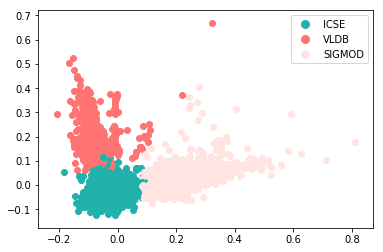

In [17]:
num_clusters = 3
num_seeds = 10
max_iterations = 300
labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1'}
pca_num_components = 2

# texts_list = some array of strings for which TF-IDF is being computed
# calculate tf-idf of texts
# create k-means model with custom config
x_train_corrected = [" ".join(x) for x in x_train]

vectorizer=TfidfVectorizer(min_df=1,max_df=0.5,stop_words='english', decode_error='ignore')
tf_idf_matrix = vectorizer.fit_transform(x_train_corrected)
clustering_model = KMeans(
    n_clusters=num_clusters,
    max_iter=max_iterations,
    precompute_distances="auto",
    n_jobs=-1
)
X = tf_idf_matrix.todense()
labels = clustering_model.fit_predict(tf_idf_matrix)

# ----------------------------------------------------------------------------------------------------------------------

reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
print(reduced_data)

fig, ax = plt.subplots()
for index, instance in enumerate(reduced_data):
    # print instance, index, labels[index]
    pca_comp_1, pca_comp_2 = reduced_data[index]
    color = labels_color_map[labels[index]]
    ax.scatter(pca_comp_1, pca_comp_2, c=color)
# verify labels
legend_elements = [Line2D([0], [0], marker='o', color='w', label='ICSE',
                          markerfacecolor=labels_color_map[0], markersize=10),
                        Line2D([0], [0], marker='o', color='w', label='VLDB',
                          markerfacecolor=labels_color_map[1], markersize=10),
                        Line2D([0], [0], marker='o', color='w', label='SIGMOD',
                          markerfacecolor=labels_color_map[2], markersize=10)]
plt.legend(handles=legend_elements, loc='upper right')
plt.show()

In [18]:
print(reduced_data.shape)
print(y_train.shape)

(12464, 2)
(12464, 1)


In [19]:
km_model = KMeans(n_clusters=3, max_iter=10, n_init=2, random_state=0)

# K-means (transform dimensions from number of features in input matrix to n_clusters)
km_model.fit(reduced_data)
df_centers = pd.DataFrame(km_model.cluster_centers_, columns=['x', 'y'])

print("df_centers:")
print(df_centers)

df_centers:
          x         y
0 -0.025954 -0.032371
1  0.191622  0.018786
2 -0.073395  0.168805


In [25]:
print(len(y_train))

12464


In [39]:
print(len(reduced_data[:,0]))
print(len(z))
print(set(z))

print(set(y_t))
print(reduced_data)

12464
12464
{0, 1, 2}


NameError: name 'y_t' is not defined

In [40]:
kmeans = KMeans(n_clusters=3, max_iter=10, n_init=2, random_state=0)  
kmeans.fit(reduced_data) 

#print(kmeans.cluster_centers_)
#print(kmeans.labels_)
#print(y)
z=kmeans.labels_ 
#g=sns.lmplot(x="x1",y="x2",data=df,fit_reg=False,hue="Class")
#sns.lmplot(x="x1",y="x2",data=df,fit_reg=False,hue=z,markers=['o','v'])
#plt.scatter(X[:,0],X[:,1],c=y, cmap='rainbow')
#plt.scatter(X[:,0],X[:,1],marker='v')
for a,b,c,d in zip(reduced_data[:,0],reduced_data[:,1],z,y_train):
    if c==0:
        if d==0:
            plt.scatter(a,b,c='y',marker='+')
        elif d==1:
            plt.scatter(a,b,c='g',marker='+')  
        elif d==2:
            plt.scatter(a,b,c='r',marker='+') 
    elif c==1:
        if d==0:
            plt.scatter(a,b,c='y',marker='o')
        elif d==1:
            plt.scatter(a,b,c='g',marker='o')  
        elif d==2:
            plt.scatter(a,b,c='r',marker='o') 
    elif c==2:
        if d==0:
            plt.scatter(a,b,c='y',marker='v')
        elif d==1:
            plt.scatter(a,b,c='g',marker='v')  
        elif d==2:
            plt.scatter(a,b,c='r',marker='v')     
plt.show()

chi squared for ICSE and VLDB

In [21]:
allFiles = ["icse_id.txt","vldb_id.txt"]
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,delimiter='\t')
    df.columns = ['id','title','title_small','year','date','unnamed','conference','conference_short','reference1','reference2','reference3']
    list_.append(df)
frame = pd.concat(list_)

data_x = frame[['title']].as_matrix()
print(data_x)
data_y = frame[['conference_short']].as_matrix()
print(data_y)

[['Co-Operative Method Development revisited']
 ['An integrated bug processing framework']
 ['Guest Editorial: Introduction to the Special Section']
 ...
 ['ACM transactions on database systems: aim and scope']
 ['The entity-relationship model—toward a unified view of data']
 ['Data Integration Using Web Services']]
[['icse']
 ['icse']
 ['icse']
 ...
 ['vldb']
 ['vldb']
 ['vldb']]


/home/jayanth/anaconda3/envs/uwindsor/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/home/jayanth/anaconda3/envs/uwindsor/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


Text(0.5,0,'$\\chi^2$ for ICSE and VLDB')

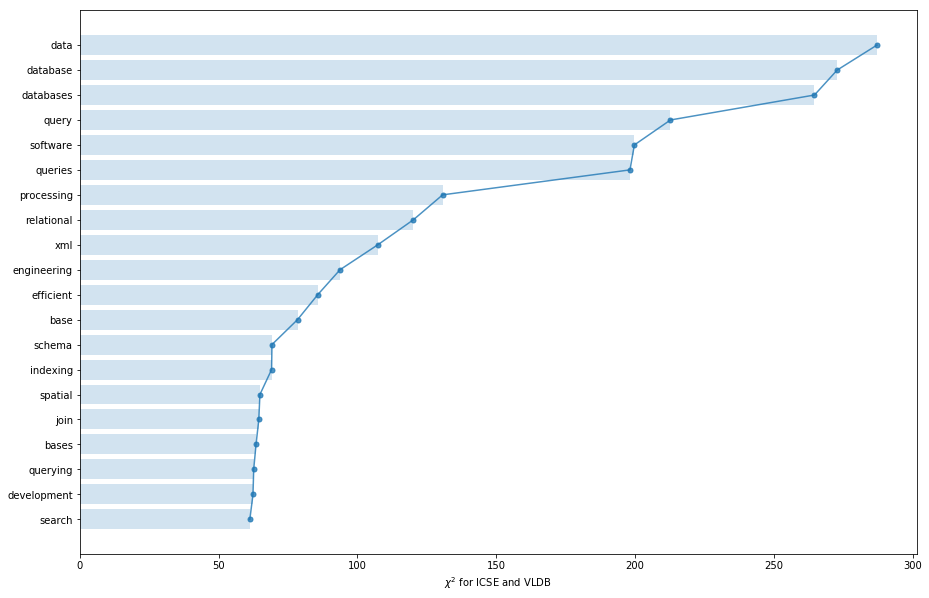

In [22]:
x_train_corrected = [" ".join(x) for x in data_x]
vectorizer=TfidfVectorizer(min_df=1,max_df=0.5,stop_words='english', decode_error='ignore')
tf_idf_matrix = vectorizer.fit_transform(x_train_corrected)
chi2score = chi2(tf_idf_matrix, data_y)[0]

plt.figure(figsize=(15,10))
wscores = zip(vectorizer.get_feature_names(), chi2score)
wchi2 = sorted(wscores, key=lambda x:x[1])
topchi2 = list(zip(*wchi2[-20:]))
x = range(len(topchi2[1]))
labels = topchi2[0]
plt.barh(x,topchi2[1], align='center', alpha=0.2)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels)
plt.xlabel('$\chi^2$ for ICSE and VLDB')

/home/jayanth/anaconda3/envs/uwindsor/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/home/jayanth/anaconda3/envs/uwindsor/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


[['Co-Operative Method Development revisited']
 ['An integrated bug processing framework']
 ['Guest Editorial: Introduction to the Special Section']
 ...
 ['Versions and workspaces in Microsoft repository']
 ['Anatomy of a real E-commerce system']
 ['Efficient optimistic concurrency control using loosely synchronized clocks']]
[['icse']
 ['icse']
 ['icse']
 ...
 ['sigmod']
 ['sigmod']
 ['sigmod']]


Text(0.5,0,'$\\chi^2$ for ICSE and SIGMOD')

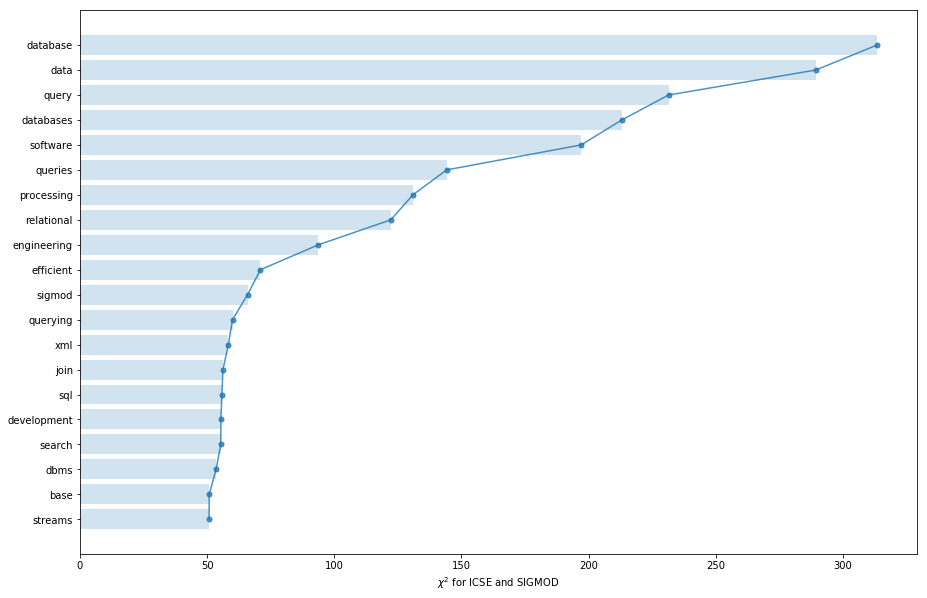

In [23]:
allFiles = ["icse_id.txt","sigmod_id.txt"]
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,delimiter='\t')
    df.columns = ['id','title','title_small','year','date','unnamed','conference','conference_short','reference1','reference2','reference3']
    list_.append(df)
frame = pd.concat(list_)

data_x = frame[['title']].as_matrix()
print(data_x)
data_y = frame[['conference_short']].as_matrix()
print(data_y)

x_train_corrected = [" ".join(x) for x in data_x]
vectorizer=TfidfVectorizer(min_df=1,max_df=0.5,stop_words='english', decode_error='ignore')
tf_idf_matrix = vectorizer.fit_transform(x_train_corrected)
chi2score = chi2(tf_idf_matrix, data_y)[0]

plt.figure(figsize=(15,10))
wscores = zip(vectorizer.get_feature_names(), chi2score)
wchi2 = sorted(wscores, key=lambda x:x[1])
topchi2 = list(zip(*wchi2[-20:]))
x = range(len(topchi2[1]))
labels = topchi2[0]
plt.barh(x,topchi2[1], align='center', alpha=0.2)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels)
plt.xlabel('$\chi^2$ for ICSE and SIGMOD')

[['Structural trend analysis for online social networks']
 ['SQL/AA: Executing SQL on an Asymmetric Architecture']
 ['SCOUT: prefetching for latent structure following queries']
 ...
 ['Versions and workspaces in Microsoft repository']
 ['Anatomy of a real E-commerce system']
 ['Efficient optimistic concurrency control using loosely synchronized clocks']]
[['vldb']
 ['vldb']
 ['vldb']
 ...
 ['sigmod']
 ['sigmod']
 ['sigmod']]


/home/jayanth/anaconda3/envs/uwindsor/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/home/jayanth/anaconda3/envs/uwindsor/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


Text(0.5,0,'$\\chi^2$ for VLDB and SIGMOD')

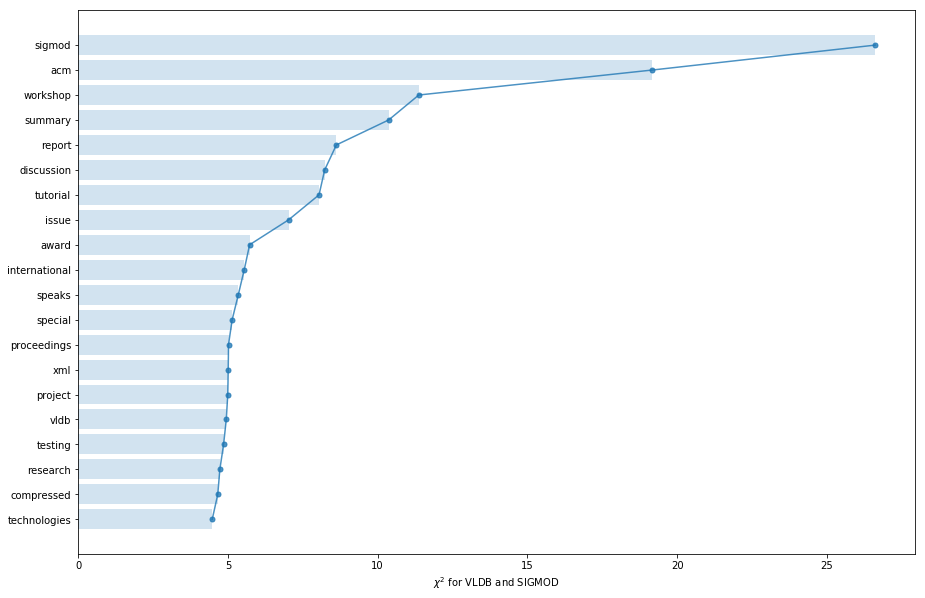

In [24]:
allFiles = ["vldb_id.txt","sigmod_id.txt"]
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,delimiter='\t')
    df.columns = ['id','title','title_small','year','date','unnamed','conference','conference_short','reference1','reference2','reference3']
    list_.append(df)
frame = pd.concat(list_)

data_x = frame[['title']].as_matrix()
print(data_x)
data_y = frame[['conference_short']].as_matrix()
print(data_y)

x_train_corrected = [" ".join(x) for x in data_x]
vectorizer=TfidfVectorizer(min_df=1,max_df=0.5,stop_words='english', decode_error='ignore')
tf_idf_matrix = vectorizer.fit_transform(x_train_corrected)
chi2score = chi2(tf_idf_matrix, data_y)[0]

plt.figure(figsize=(15,10))
wscores = zip(vectorizer.get_feature_names(), chi2score)
wchi2 = sorted(wscores, key=lambda x:x[1])
topchi2 = list(zip(*wchi2[-20:]))
x = range(len(topchi2[1]))
labels = topchi2[0]
plt.barh(x,topchi2[1], align='center', alpha=0.2)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels)
plt.xlabel('$\chi^2$ for VLDB and SIGMOD')